In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('./dataset/fuel.csv')

display(fuel)

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1103,3.0,6,S6,29.7892,Turbocharged,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1104,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1105,3.2,6,S6,29.7431,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0


In [2]:
# Coping the data frame so it's possible to work with it without changing the original one
X = fuel.copy()

# Getting the taget as y
y = X.pop('FE')

In [3]:
# Preprocessing the data, i.e StandardScaler into numeric columns and OneHotEncoder into categorical columns
preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
    make_column_selector(dtype_include=object)),
)

In [4]:
# applying preprocessor to the data frame
X = preprocessor.fit_transform(X)
display(pd.DataFrame(X[:10,:]).head())

# log transform target instead of standardizing
y = np.log(y)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Getting the input_shape from columns left in data frame
input_shape = [X.shape[1]]
print('Input shape: {}'.format(input_shape))

Input shape: [50]


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# defining the network
model = keras.Sequential([
    # Net hidden layers
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    # Net output layer
    layers.Dense(1),
])

2023-07-25 16:00:57.807603: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 16:00:57.871021: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 16:00:59.537427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
# Adding Loss and Optimizer
model.compile(
    optimizer='adam',
    loss='mae'
)

In [8]:
# Training the model
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 3.1017
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.5165
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7273
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3843
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2610
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1882
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1544
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1271
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1067
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0841
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

<Axes: >

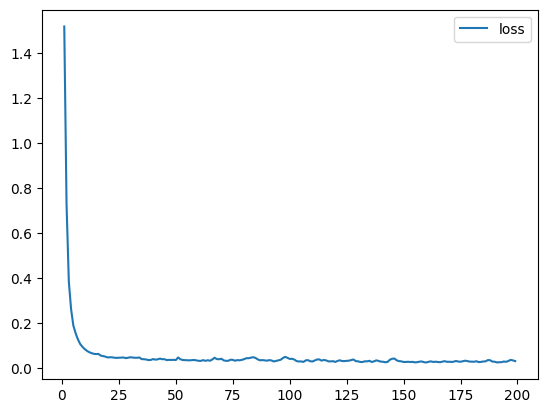

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss']].plot()